In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
# data.to_csv('../raw_data/final_processed_xy_data.csv')
data = pd.read_csv('../raw_data/final_processed_xy_data.csv', index_col=False)
data = data.drop(columns= 'Unnamed: 0')
print(data.shape)
data.head(2)

(35040, 47)


,temperature_2m,relativehumidity_2m,apparent_temperature,windspeed_10m,precipitation,hour_sin,hour_cos,month_sin,month_cos,day_sin,...,Schwanthalerhöhe,Sendling,Sendling-Westpark,Südgiesing,Thalkirchen,Trudering,Trudering-Riem,Untergiesing,Untergiesing-Harlaching,Untermenzing-Allach
0,0.355408,1.000000,0.342007,0.227848,0.017391,0.62941,0.982963,0.75,0.933013,0.600779,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.357616,0.987013,0.340149,0.245570,0.008696,0.75000,0.933013,0.75,0.933013,0.600779,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Outlier Detection

In [42]:
# Function to detect and print outliers 
def detect_outliers(data):
    # mean, standard deviation and 3-sigma of the data
    mean = np.mean(data)
    std = np.std(data)
    threshold = 3
    
    # print upper, lower boundary and boxplot
    sns.boxplot(data, orient="v")
    plt.show()
    lower, upper = mean-(threshold*std), mean+(threshold)*std
    print(f"Upper and lower boundary is: {lower}/{upper}")
    
    # identify outliers and return the outliers
    # outliers = [x for x in data if np.abs(x - mean) > (3 * std)]
    # print(f"There are {len(outliers)} outliers based on three-sigma rule")

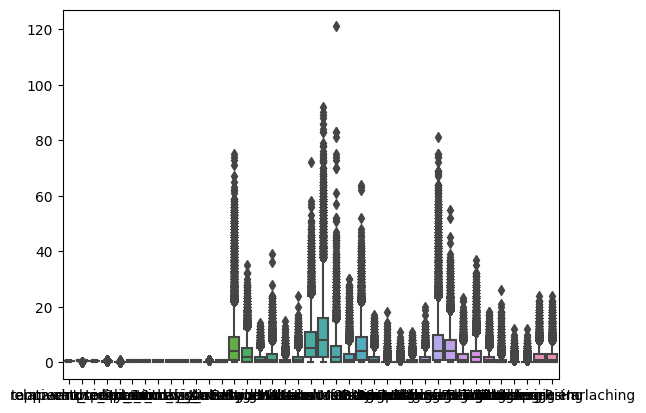

Upper and lower boundary is: temperature_2m                   1.143837
relativehumidity_2m              0.957886
apparent_temperature             1.131661
windspeed_10m                    1.333502
precipitation                    1.884116
hour_sin                         0.267643
hour_cos                         0.267643
month_sin                        0.271331
month_cos                        0.264024
day_sin                          0.249426
day_cos                          0.279852
is_holiday                       1.108751
is_weekend                      -0.221499
Altstadt-Lehel                 -40.682866
Au - Haidhausen                -17.764583
Berg am Laim                    -5.968961
Bogenhausen                    -12.978039
Hadern                          -3.309767
Laim                            -7.864401
Ludwigsvorstadt-Isarvorstadt   -36.053289
Maxvorstadt                    -53.377254
Milbertshofen-Am Hart          -22.700991
Moosach                        -12.018087
Neuha

In [43]:
detect_outliers(data)

In [7]:
data.columns

Index(['temperature_2m', 'relativehumidity_2m', 'apparent_temperature',
       'windspeed_10m', 'precipitation', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'is_holiday', 'is_weekend',
       'Altstadt-Lehel', 'Au - Haidhausen', 'Aubing-Lochhausen-Langwied',
       'Berg am Laim', 'Bogenhausen', 'Feldmoching', 'Hadern', 'Harlaching',
       'Hasenbergl-Lerchenau Ost', 'Laim', 'Lochhausen',
       'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt', 'Milbertshofen-Am Hart',
       'Moosach', 'Neuhausen-Nymphenburg', 'Obergiesing', 'Obermenzing',
       'Obersendling', 'Pasing', 'Pasing-Obermenzing', 'Ramersdorf-Perlach',
       'Schwabing-Freimann', 'Schwabing-West', 'Schwanthalerhöhe', 'Sendling',
       'Sendling-Westpark', 'Südgiesing', 'Thalkirchen', 'Trudering',
       'Trudering-Riem', 'Untergiesing', 'Untergiesing-Harlaching',
       'Untermenzing-Allach'],
      dtype='object')

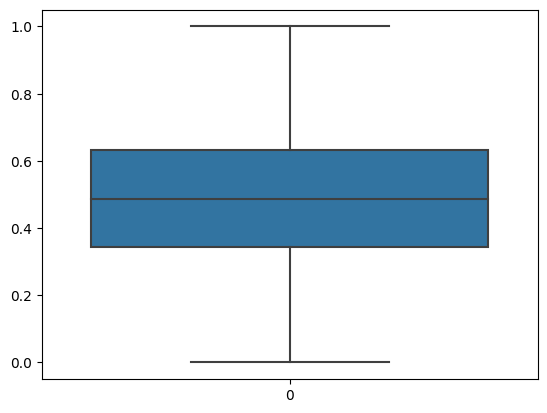

Upper and lower boundary is: -0.03981224682910839/1.0300756607011134
There are 0 outliers based on three-sigma rule


In [13]:
detect_outliers(data['temperature_2m'])

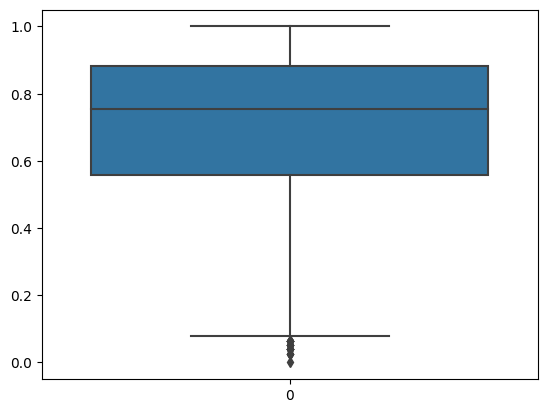

Upper and lower boundary is: 0.05748275220444865/1.350511821714783
There are 20 outliers based on three-sigma rule


In [14]:
detect_outliers(data['relativehumidity_2m'])

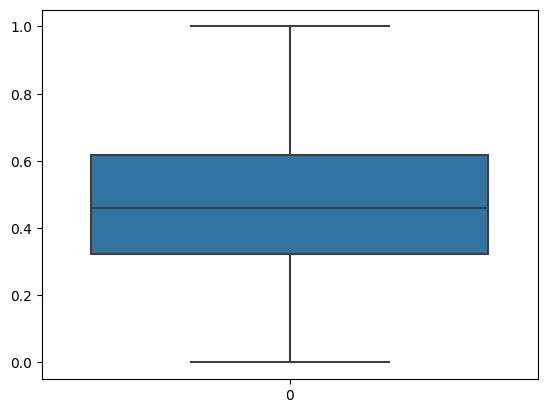

Upper and lower boundary is: -0.06876146928980814/1.015737628241447
There are 0 outliers based on three-sigma rule


In [15]:
detect_outliers(data['apparent_temperature'])

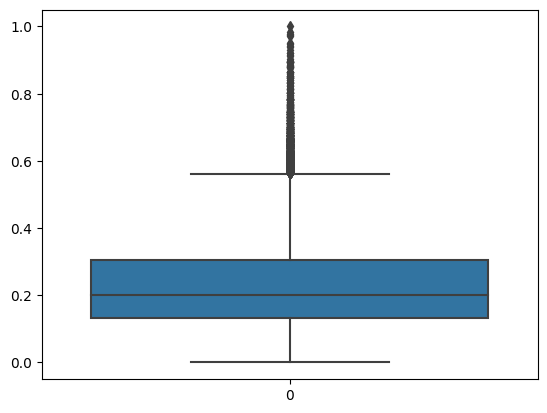

Upper and lower boundary is: -0.18918854180863068/0.653100887915792
There are 402 outliers based on three-sigma rule


In [16]:
detect_outliers(data['windspeed_10m'])

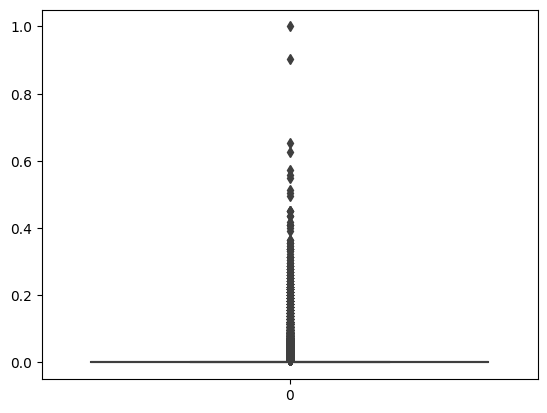

Upper and lower boundary is: -0.08172791441766168/0.09982549234102873
There are 708 outliers based on three-sigma rule


In [17]:
detect_outliers(data['precipitation'])

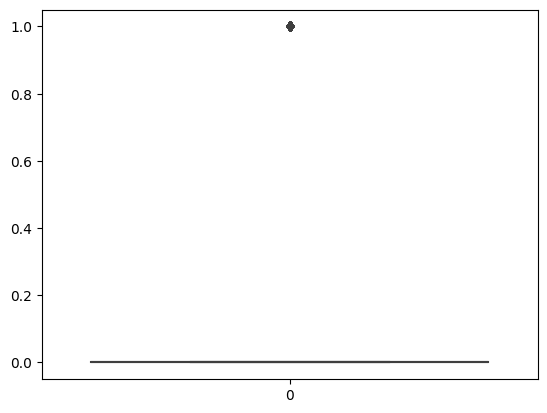

Upper and lower boundary is: -0.5203792172697348/0.5916120939820635
There are 1248 outliers based on three-sigma rule
is_holiday
0    33792
1     1248
Name: count, dtype: int64


In [26]:
detect_outliers(data['is_holiday'])
print(data['is_holiday'].value_counts())

In [29]:
data.drop(columns= ['Aubing-Lochhausen-Langwied', 'Harlaching', 'Südgiesing',
                'Hasenbergl-Lerchenau Ost', 'Obermenzing', 'Feldmoching', 
                'Untermenzing-Allach', 'Lochhausen'], inplace=True)

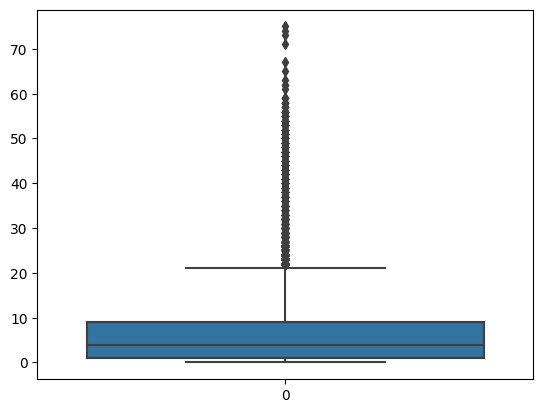

Upper and lower boundary is: -19.029510209867816/32.23242116877193
There are 794 outliers based on three-sigma rule


In [30]:
detect_outliers(data['Altstadt-Lehel'])

In [31]:
data.columns

Index(['temperature_2m', 'relativehumidity_2m', 'apparent_temperature',
       'windspeed_10m', 'precipitation', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'is_holiday', 'is_weekend',
       'Altstadt-Lehel', 'Au - Haidhausen', 'Berg am Laim', 'Bogenhausen',
       'Hadern', 'Laim', 'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt',
       'Milbertshofen-Am Hart', 'Moosach', 'Neuhausen-Nymphenburg',
       'Obergiesing', 'Obersendling', 'Pasing', 'Pasing-Obermenzing',
       'Ramersdorf-Perlach', 'Schwabing-Freimann', 'Schwabing-West',
       'Schwanthalerhöhe', 'Sendling', 'Sendling-Westpark', 'Thalkirchen',
       'Trudering', 'Trudering-Riem', 'Untergiesing',
       'Untergiesing-Harlaching'],
      dtype='object')

In [55]:
def handle_outliers(data, columns):
    data = data.values  # Convert DataFrame to numpy array

    # Iterate over columns
    for col in range(data.shape[1]):
        column_data = data[:, col]  # Extract column data

        # Calculate mean, standard deviation, and 3-sigma of the column
        mean = np.mean(column_data)
        std = np.std(column_data)
        threesigma = 3 * std
        
        sns.boxplot(column_data, orient="v")
        plt.show()
        lower, upper = mean - 3 * std, mean + 3 * std
        print(f"Upper and lower boundary for column {columns[col]} is: {lower}/{upper}")
        
        # Replace outliers with the closest boundary
        data[:, col] = np.where(np.abs(column_data - mean) > threesigma, np.where(column_data > mean, upper, lower), column_data)
    
    # Convert back to DataFrame
    df = pd.DataFrame(data, columns=columns)
    
    return df


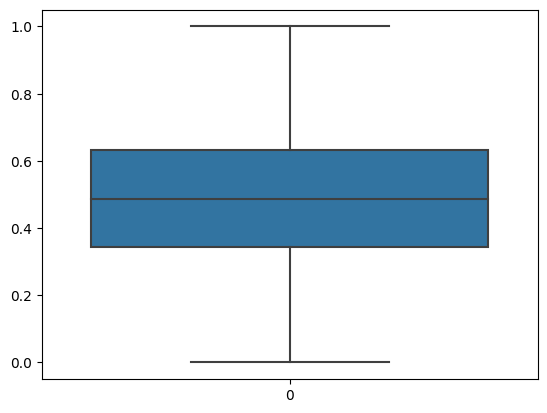

Upper and lower boundary for column temperature_2m is: -0.03981224682910839/1.0300756607011134


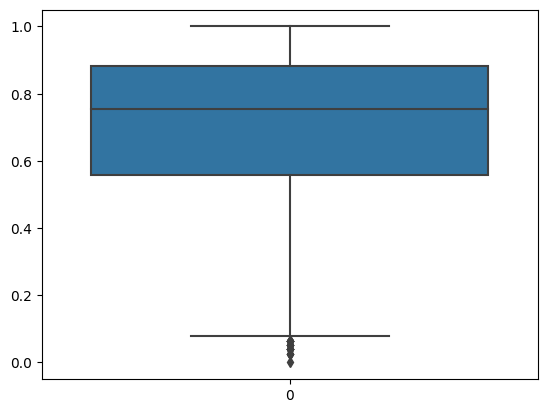

Upper and lower boundary for column relativehumidity_2m is: 0.05748275220444865/1.350511821714783


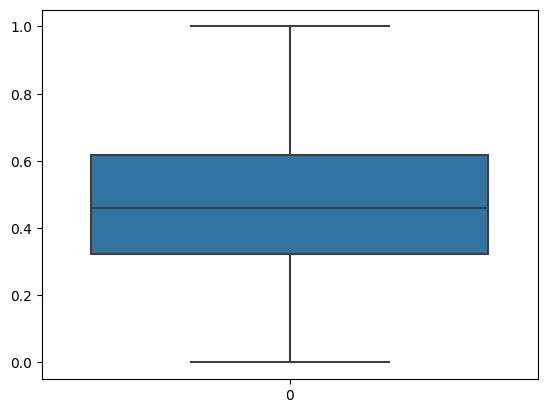

Upper and lower boundary for column apparent_temperature is: -0.06876146928980814/1.015737628241447


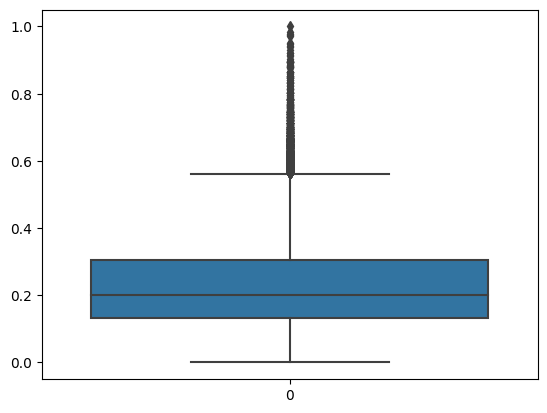

Upper and lower boundary for column windspeed_10m is: -0.18918854180863068/0.653100887915792


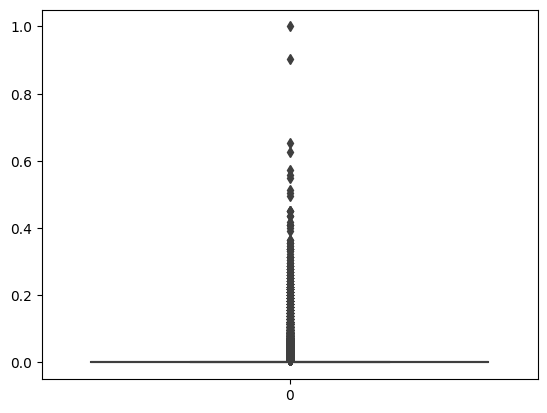

Upper and lower boundary for column precipitation is: -0.08172791441766168/0.09982549234102873


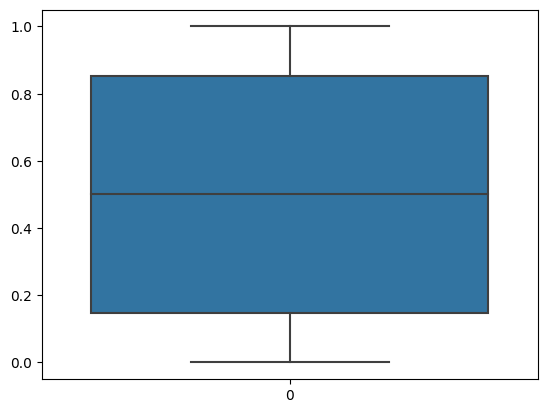

Upper and lower boundary for column hour_sin is: -0.5606601717798215/1.5606601717798214


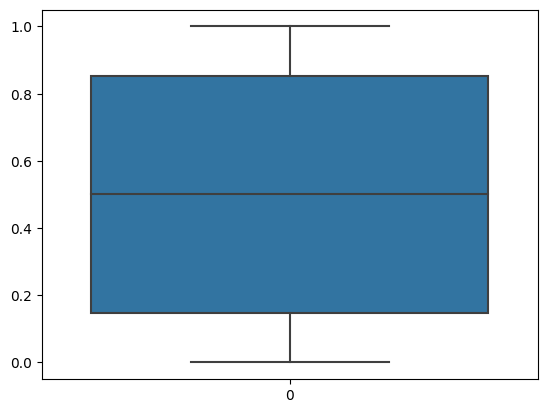

Upper and lower boundary for column hour_cos is: -0.5606601717798214/1.5606601717798214


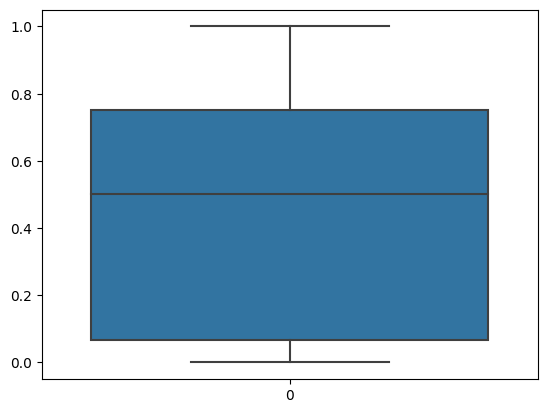

Upper and lower boundary for column month_sin is: -0.5611382629841082/1.5557571626686622


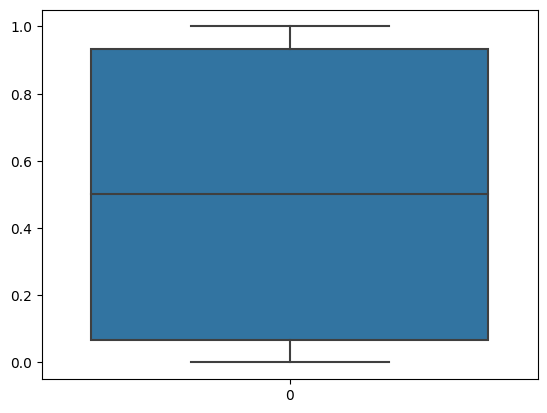

Upper and lower boundary for column month_cos is: -0.5640177532483388/1.561645080909203


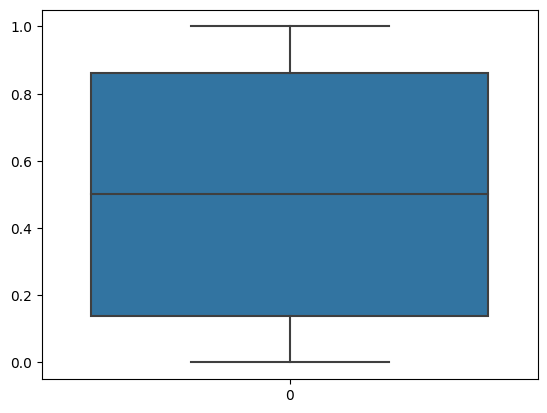

Upper and lower boundary for column day_sin is: -0.5707737172322183/1.572407744289302


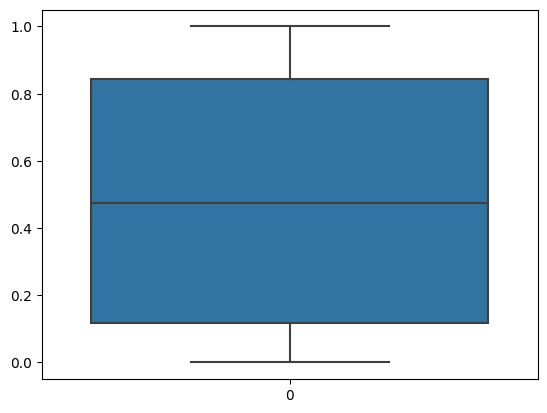

Upper and lower boundary for column day_cos is: -0.5640952684212567/1.5425747562768506


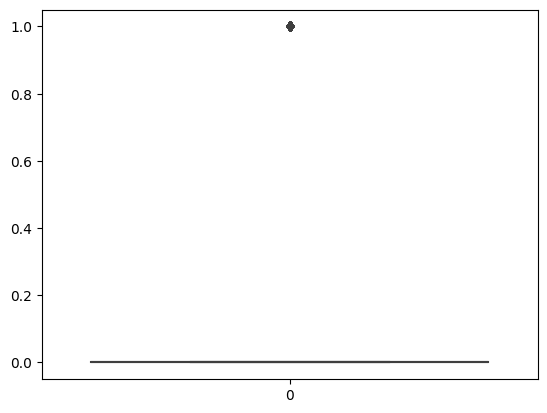

Upper and lower boundary for column is_holiday is: -0.5203792172697348/0.5916120939820635


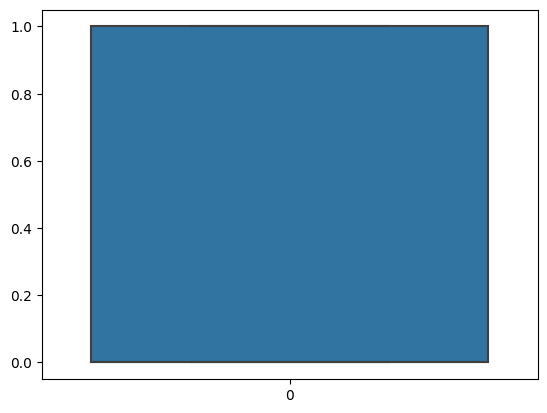

Upper and lower boundary for column is_weekend is: -1.0692139392845352/1.6390769529831652


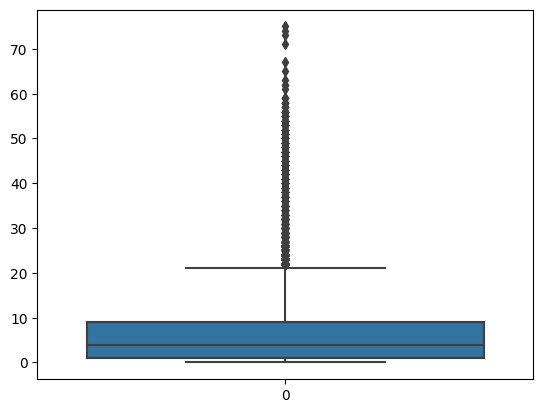

Upper and lower boundary for column Altstadt-Lehel is: -19.029510209867816/32.23242116877193


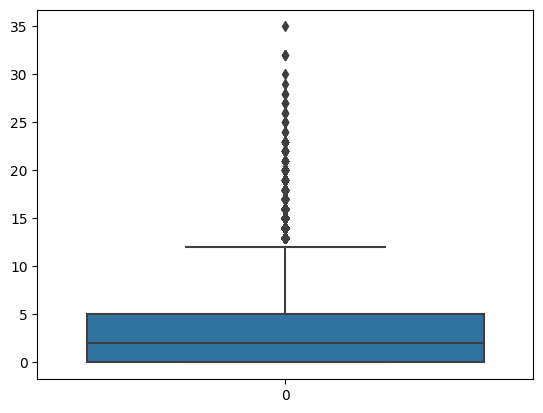

Upper and lower boundary for column Au - Haidhausen is: -8.413414651758872/15.346576752215492


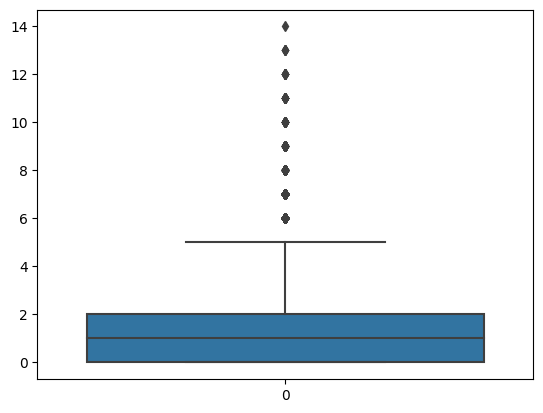

Upper and lower boundary for column Berg am Laim is: -3.6309619153500754/5.974283833158294


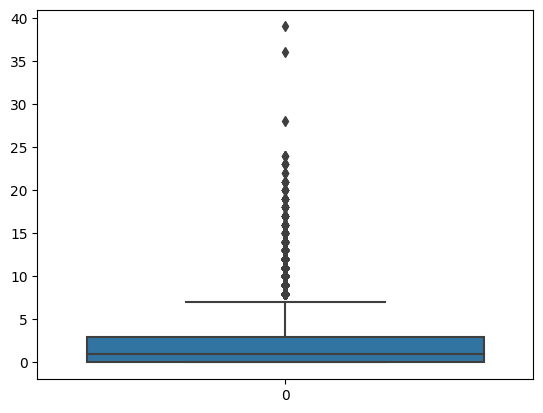

Upper and lower boundary for column Bogenhausen is: -6.6632918202044165/11.352846614724964


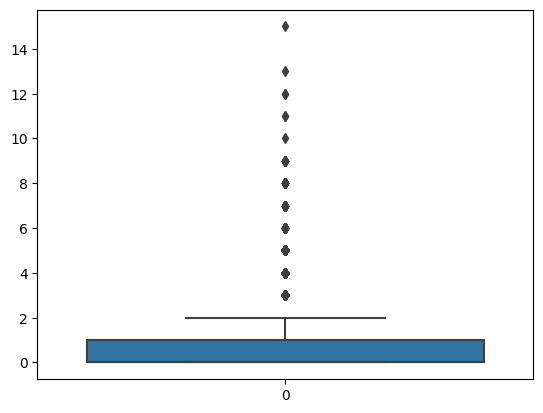

Upper and lower boundary for column Hadern is: -2.623830040098023/3.7903825515135483


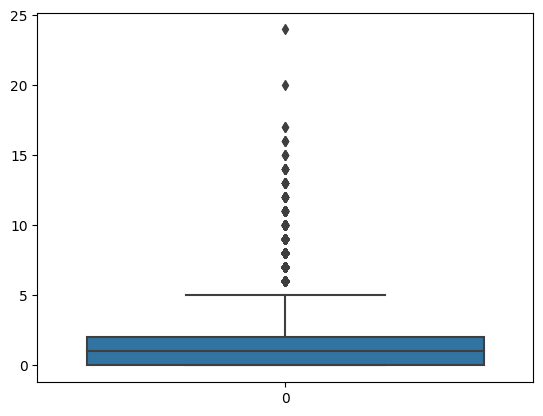

Upper and lower boundary for column Laim is: -4.383750967368452/7.496022656866169


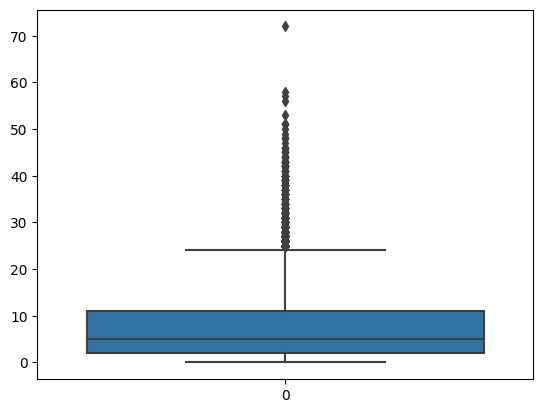

Upper and lower boundary for column Ludwigsvorstadt-Isarvorstadt is: -15.35105072365144/30.35538862319482


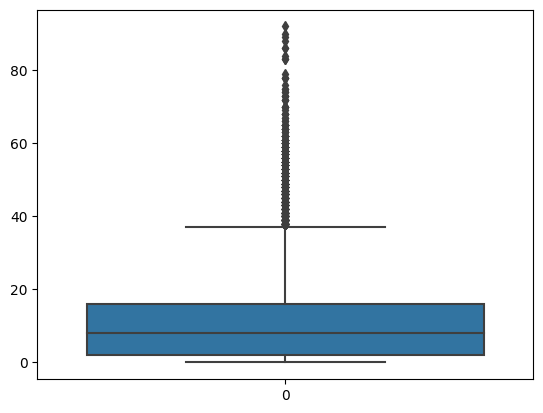

Upper and lower boundary for column Maxvorstadt is: -22.25096612316522/44.24423096334787


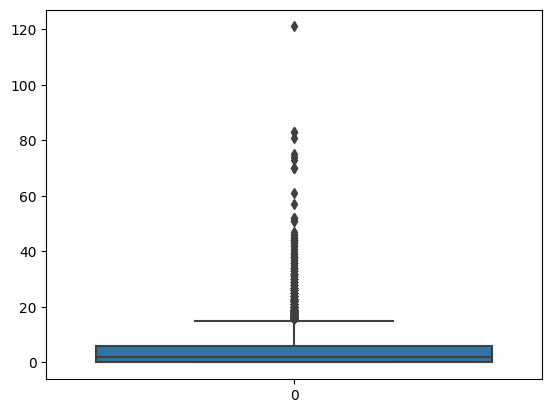

Upper and lower boundary for column Milbertshofen-Am Hart is: -10.99195499824446/18.691726687742175


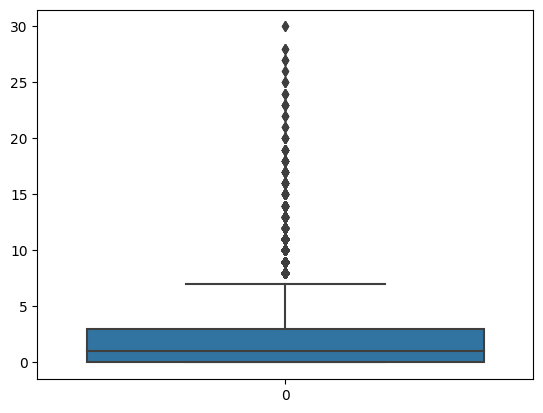

Upper and lower boundary for column Moosach is: -6.427018374040121/10.43717819139172


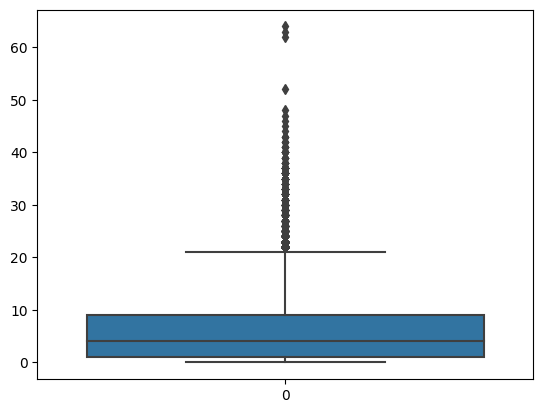

Upper and lower boundary for column Neuhausen-Nymphenburg is: -13.648864250167126/25.9739213277927


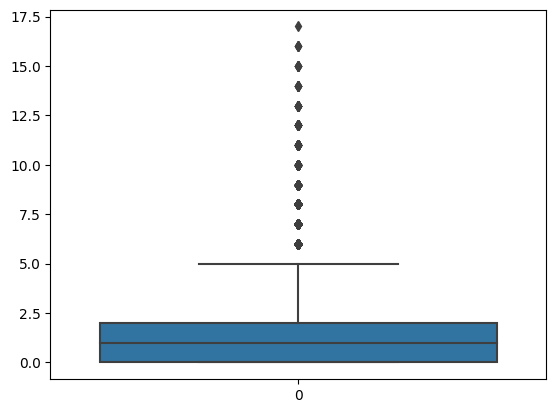

Upper and lower boundary for column Obergiesing is: -4.325015123966247/7.360460329445698


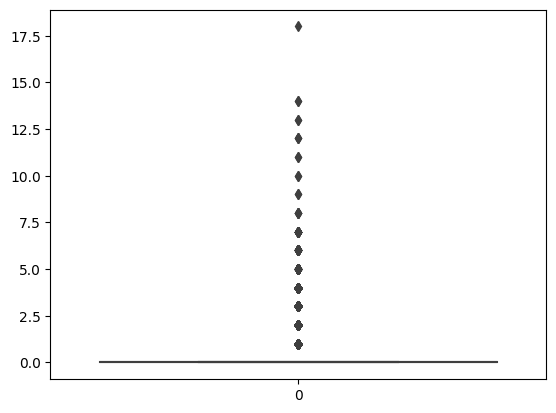

Upper and lower boundary for column Obersendling is: -2.0444732929077496/2.700238133090398


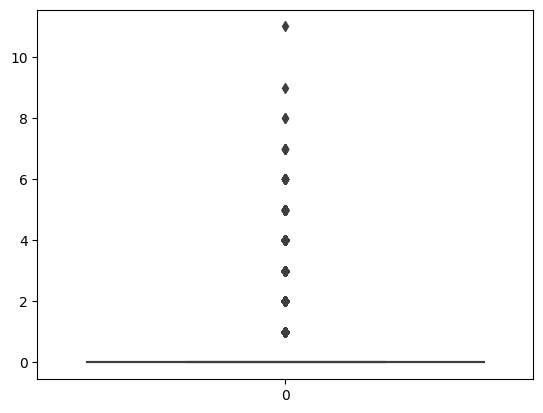

Upper and lower boundary for column Pasing is: -1.9311059190680009/2.6378410788853524


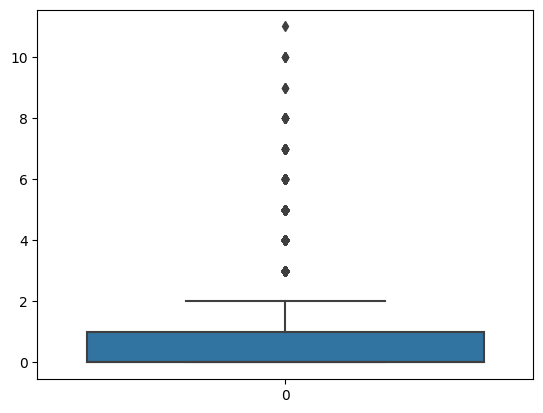

Upper and lower boundary for column Pasing-Obermenzing is: -2.4773332692415924/3.512321853716478


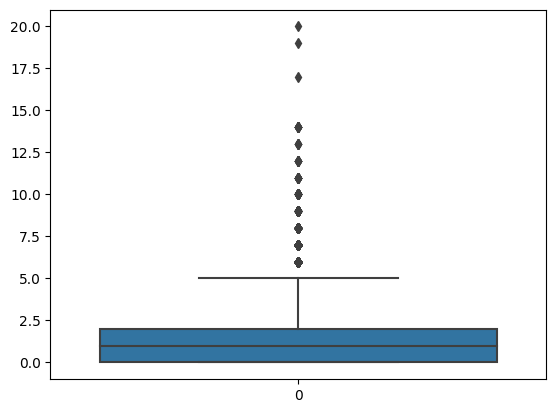

Upper and lower boundary for column Ramersdorf-Perlach is: -3.8338877072735427/6.194504145629707


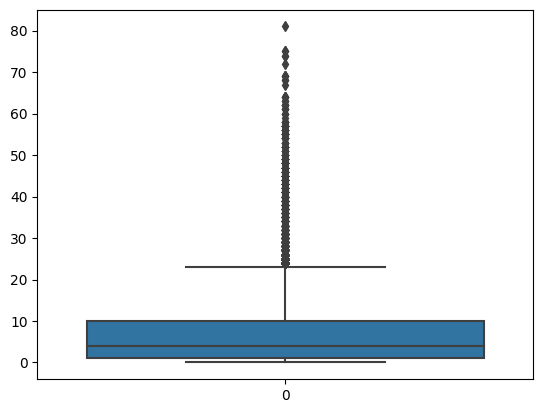

Upper and lower boundary for column Schwabing-Freimann is: -18.965473745340734/33.20388698734987


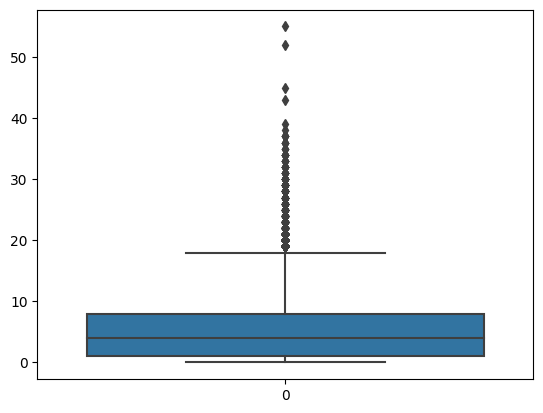

Upper and lower boundary for column Schwabing-West is: -11.384430724432868/22.191165884250218


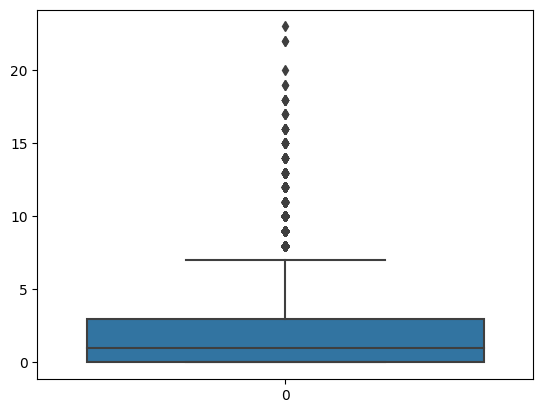

Upper and lower boundary for column Schwanthalerhöhe is: -5.334148060523534/9.299045320797507


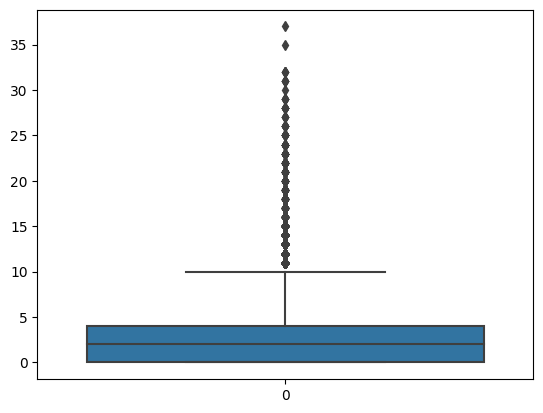

Upper and lower boundary for column Sendling is: -8.629220782769352/14.83287375080588


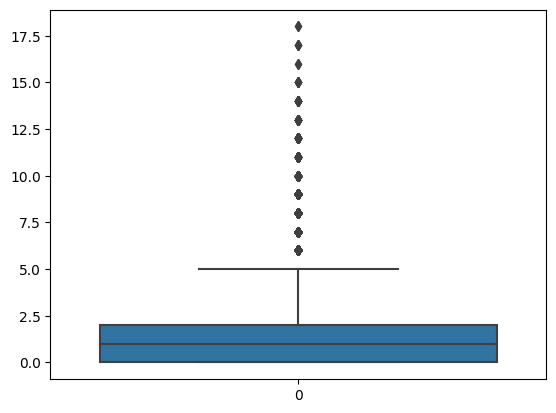

Upper and lower boundary for column Sendling-Westpark is: -4.758298931587596/7.852762401907231


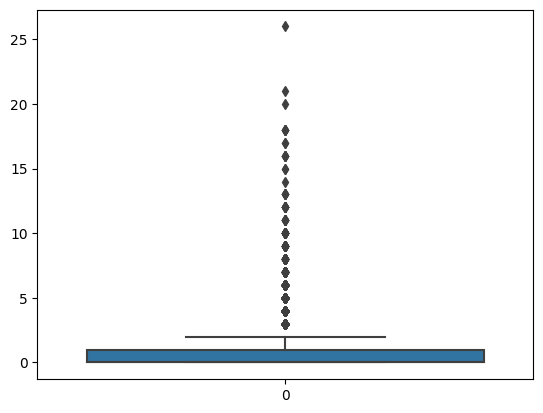

Upper and lower boundary for column Thalkirchen is: -3.199308123027219/4.411922278278361


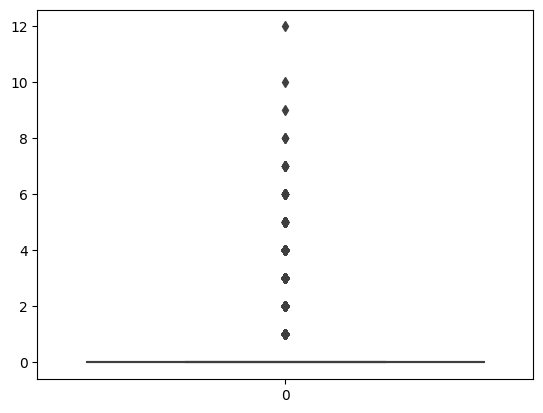

Upper and lower boundary for column Trudering is: -1.9435498855342843/2.5900110727488963


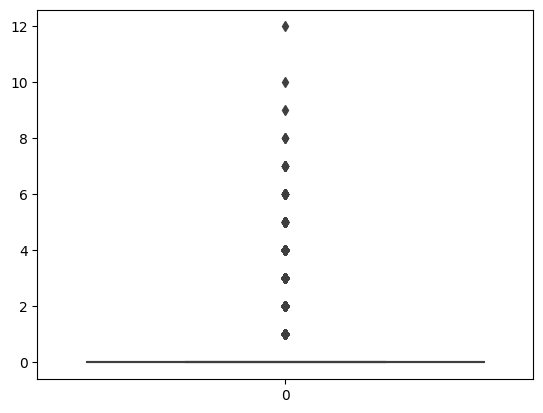

Upper and lower boundary for column Trudering-Riem is: -1.9435498855342843/2.5900110727488963


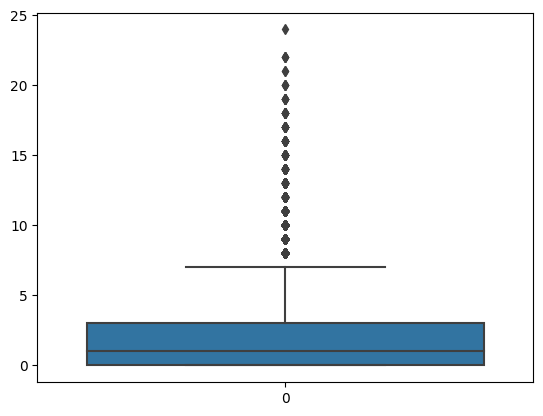

Upper and lower boundary for column Untergiesing is: -5.635358614095316/9.252196513638696


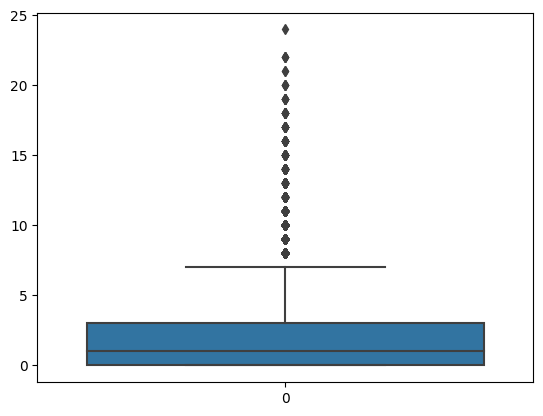

Upper and lower boundary for column Untergiesing-Harlaching is: -5.635358614095316/9.252196513638696


,temperature_2m,relativehumidity_2m,apparent_temperature,windspeed_10m,precipitation,hour_sin,hour_cos,month_sin,month_cos,day_sin,...,Schwabing-Freimann,Schwabing-West,Schwanthalerhöhe,Sendling,Sendling-Westpark,Thalkirchen,Trudering,Trudering-Riem,Untergiesing,Untergiesing-Harlaching
0,0.355408,1.000000,0.342007,0.227848,0.017391,0.629410,0.982963,0.75,0.933013,0.600779,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.357616,0.987013,0.340149,0.245570,0.008696,0.750000,0.933013,0.75,0.933013,0.600779,...,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.359823,1.000000,0.336431,0.303797,0.017391,0.853553,0.853553,0.75,0.933013,0.600779,...,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.359823,0.987013,0.332714,0.341772,0.008696,0.933013,0.750000,0.75,0.933013,0.600779,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.359823,1.000000,0.332714,0.356962,0.000000,0.982963,0.629410,0.75,0.933013,0.600779,...,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [56]:
data_handled = handle_outliers(data, data.columns)
data_handled.head(5)

In [58]:
data_handled.to_csv('../raw_data/data_outliers_removed.csv', index=False)

In [72]:
data_handled.columns

Index(['temperature_2m', 'relativehumidity_2m', 'apparent_temperature',
       'windspeed_10m', 'precipitation', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'is_holiday', 'is_weekend',
       'Altstadt-Lehel', 'Au - Haidhausen', 'Berg am Laim', 'Bogenhausen',
       'Hadern', 'Laim', 'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt',
       'Milbertshofen-Am Hart', 'Moosach', 'Neuhausen-Nymphenburg',
       'Obergiesing', 'Obersendling', 'Pasing', 'Pasing-Obermenzing',
       'Ramersdorf-Perlach', 'Schwabing-Freimann', 'Schwabing-West',
       'Schwanthalerhöhe', 'Sendling', 'Sendling-Westpark', 'Thalkirchen',
       'Trudering', 'Trudering-Riem', 'Untergiesing',
       'Untergiesing-Harlaching'],
      dtype='object')

In [74]:
def get_folds(
    df: pd.DataFrame,
    fold_length: int,
    fold_stride: int):
    """
    This function slides through the Time Series dataframe of shape (n_timesteps, n_features) to create folds
    - of equal `fold_length`
    - using `fold_stride` between each fold

    Args:
        df (pd.DataFrame): Overall dataframe
        fold_length (int): How long each fold should be in rows
        fold_stride (int): How many timesteps to move forward between taking each fold

    Returns:
        List[pd.DataFrame]: A list where each fold is a dataframe within
    """
    folds = []
    for idx in range(0, len(df), fold_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (idx + fold_length) > len(df):
            break
        fold = df.iloc[idx:idx + fold_length, :]
        folds.append(fold)
    return folds


FOLD_LENGTH = 8760
FOLD_STRIDE = 8760
TRAIN_TEST_RATIO = 0.8 # train-test-split ratio of 2/3
INPUT_LENGTH = 336 # 24 h * 14 days -> 2 weeks of input
OUTPUT_LENGTH = 24

fold_dfs = get_folds(data_handled, fold_length=FOLD_LENGTH, fold_stride=FOLD_STRIDE)

In [81]:
districts = ['Altstadt-Lehel', 'Au - Haidhausen', 'Berg am Laim', 'Bogenhausen',
       'Hadern', 'Laim', 'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt',
       'Milbertshofen-Am Hart', 'Moosach', 'Neuhausen-Nymphenburg',
       'Obergiesing', 'Obersendling', 'Pasing',
       'Pasing-Obermenzing', 'Ramersdorf-Perlach', 'Schwabing-Freimann',
       'Schwabing-West', 'Schwanthalerhöhe', 'Sendling', 'Sendling-Westpark',
       'Thalkirchen', 'Trudering', 'Trudering-Riem',
       'Untergiesing', 'Untergiesing-Harlaching']

In [83]:
models = []
district_score_means = []

for dist in districts:
    scores_list = []

    indices = [0, 1, 2, 3]
        
    for id in range(4):
        xgb_r = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

        test_df = fold_dfs[id]
        train_folds = [fold_dfs[i] for i in indices if i != id]
        
        train_df = pd.concat(train_folds, axis=0)
        X_test = test_df.drop(columns= districts)
        y_test = test_df[dist]
        X_train = train_df.drop(columns= districts)
        y_train = train_df[dist]
        

        
        xgb_r.fit(X_train, y_train)
        y_pred = [x if x >= 0 else 0 for x in xgb_r.predict(X_test)]
        scores = r2_score(y_test , y_pred)
        scores = np.sqrt(mean_squared_error(y_test, xgb_r.predict(X_test)))
        # scores_list.append(scores)
        print(f"{id} >>> scores={scores_list}")
        
    scores_array = np.array(scores)
    district_score_means.append(np.mean(scores_array.flatten()))

[14:41:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
0 >>> scores=[]
[14:41:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
1 >>> scores=[]
[14:41:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
2 >>> scores=[]
[14:41:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
3 >>> scores=[]
[14:41:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
0 >>> scores=[]
[14:41:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
1 >>> scores=[]
[14:41:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
2 >>> scores=[]
[14:41:27] WARNING: ../src/objective/regression_obj.cu:

In [84]:
scores_df = pd.DataFrame(district_score_means, columns=['score'], index=districts)

In [85]:
scores_df.sort_values(by=['score'], inplace=True) 

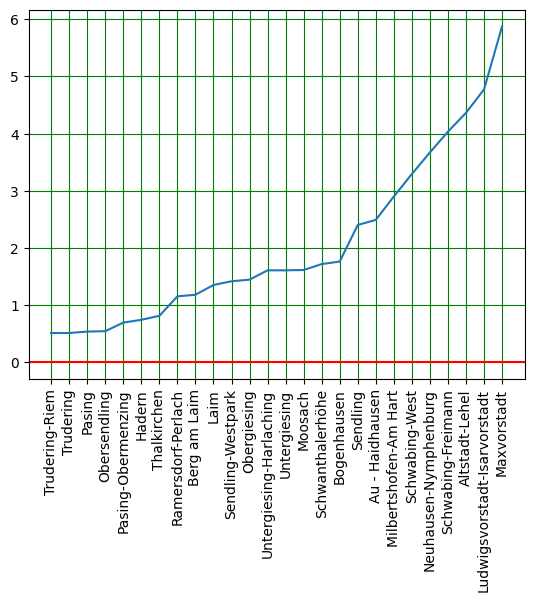

In [86]:
plt.plot(scores_df.index, scores_df['score'])
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(c='g')
plt.show()

In [87]:
print(f"mean = {np.mean(district_score_means)}")
print(f"min = {np.min(district_score_means)}")
print(f"max = {np.max(district_score_means)}")

mean = 2.0412884647614327
min = 0.5151702214796279
max = 5.874152420615593
